In [1]:

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#loading given dataset
result=pd.read_csv("/home/chaitanya/Documents/PythonProjects/TCSHumanAI/dataset/Power-Networks-LCL.csv",header=0)

In [3]:
#fetching unique households id
print(result['LCLid'].unique())

['MAC000002' 'MAC000003' 'MAC000004' 'MAC000006' 'MAC000007' 'MAC000008'
 'MAC000009' 'MAC000010' 'MAC000011' 'MAC000012' 'MAC000013' 'MAC000016'
 'MAC000018' 'MAC000019' 'MAC000020' 'MAC000021' 'MAC000022' 'MAC000023'
 'MAC000024' 'MAC000025' 'MAC000026' 'MAC000027' 'MAC000028' 'MAC000029'
 'MAC000030' 'MAC000032' 'MAC000033' 'MAC000034' 'MAC000035' 'MAC000036']


In [4]:
#storing the LCLid as key and its count as value in dictionary
dict={}
for i in result['LCLid'].unique():
    dict.update({i:result['LCLid'][result.LCLid == i].count()})
print(dict)
count_list=list(dict.values())
print(count_list)

{'MAC000002': 24157, 'MAC000003': 35468, 'MAC000004': 31676, 'MAC000006': 36460, 'MAC000007': 25045, 'MAC000008': 26012, 'MAC000009': 25237, 'MAC000010': 25048, 'MAC000011': 23704, 'MAC000012': 24669, 'MAC000013': 29613, 'MAC000016': 19523, 'MAC000018': 39081, 'MAC000019': 39070, 'MAC000020': 39078, 'MAC000021': 39078, 'MAC000022': 39071, 'MAC000023': 39068, 'MAC000024': 39026, 'MAC000025': 39064, 'MAC000026': 39064, 'MAC000027': 39068, 'MAC000028': 32157, 'MAC000029': 39063, 'MAC000030': 39066, 'MAC000032': 39068, 'MAC000033': 39070, 'MAC000034': 39069, 'MAC000035': 39023, 'MAC000036': 16175}
[24157, 35468, 31676, 36460, 25045, 26012, 25237, 25048, 23704, 24669, 29613, 19523, 39081, 39070, 39078, 39078, 39071, 39068, 39026, 39064, 39064, 39068, 32157, 39063, 39066, 39068, 39070, 39069, 39023, 16175]


In [6]:
#function to getting top 3 households
def findmaxelements(initiallist): 
    output_list = [] 
    for i in range(0, 3):  
        maxelement1 = 0  
        for j in range(len(initiallist)):      
            if initiallist[j] > maxelement1: 
                maxelement1 = initiallist[j]          
        initiallist.remove(maxelement1); 
        output_list.append(maxelement1)      
    return output_list
maxelement_list=findmaxelements(count_list)
print(maxelement_list)
print(count_list)
household_list=[]
for j in dict.keys():
    if dict.get(j) in maxelement_list:
        household_list.append(j)
#list storing top 3 households
print(household_list)

[39071, 39070, 39070]
[24157, 35468, 31676, 36460, 25045, 26012, 25237, 25048, 23704, 24669, 29613, 19523, 39068, 39026, 39064, 39064, 39068, 32157, 39063, 39066, 39068, 39069, 39023, 16175]
['MAC000019', 'MAC000022', 'MAC000033']


In [7]:
#dataframe containing data of household having maximmum no. of samples
new_data1=result[result.LCLid==household_list[0]]
print(new_data1)

            LCLid stdorToU                     DateTime    KWh    Acorn  \
365693  MAC000019      Std  2011-12-07 15:00:00.0000000  0.201  ACORN-K   
365694  MAC000019      Std  2011-12-07 15:30:00.0000000  0.190  ACORN-K   
365695  MAC000019      Std  2011-12-07 16:00:00.0000000  0.165  ACORN-K   
365696  MAC000019      Std  2011-12-07 16:30:00.0000000  0.159  ACORN-K   
365697  MAC000019      Std  2011-12-07 17:00:00.0000000  0.241  ACORN-K   
...           ...      ...                          ...    ...      ...   
404758  MAC000019      Std  2014-02-27 22:30:00.0000000  0.180  ACORN-K   
404759  MAC000019      Std  2014-02-27 23:00:00.0000000  0.185  ACORN-K   
404760  MAC000019      Std  2014-02-27 23:30:00.0000000  0.192  ACORN-K   
404761  MAC000019      Std  2014-02-28 00:00:00.0000000  0.168  ACORN-K   
404762  MAC000019      Std  2014-02-28 00:00:00.0000000  0.168  ACORN-K   

       Acorn_grouped  
365693     Adversity  
365694     Adversity  
365695     Adversity  
365696 

In [9]:
#storing dataframe data into preprocessed1
new_csv1=new_data1.to_csv(r'/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/preprocessed1.csv', index = None, header=True)
resample_data1=pd.read_csv("/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/preprocessed1.csv",header=0)
resample_data1['date']=pd.to_datetime(resample_data1['DateTime'])
resample_data1=resample_data1.set_index(resample_data1.date)

                         LCLid stdorToU                     DateTime     KWh  \
date                                                                           
2011-12-07 15:00:00  MAC000019      Std  2011-12-07 15:00:00.0000000  0.1955   
2011-12-07 16:00:00  MAC000019      Std  2011-12-07 16:00:00.0000000  0.1620   
2011-12-07 17:00:00  MAC000019      Std  2011-12-07 17:00:00.0000000  0.5575   
2011-12-07 18:00:00  MAC000019      Std  2011-12-07 18:00:00.0000000  0.3705   
2011-12-07 19:00:00  MAC000019      Std  2011-12-07 19:00:00.0000000  0.1805   
...                        ...      ...                          ...     ...   
2014-02-27 20:00:00  MAC000019      Std  2014-02-27 20:00:00.0000000  0.1560   
2014-02-27 21:00:00  MAC000019      Std  2014-02-27 21:00:00.0000000  0.1470   
2014-02-27 22:00:00  MAC000019      Std  2014-02-27 22:00:00.0000000  0.1865   
2014-02-27 23:00:00  MAC000019      Std  2014-02-27 23:00:00.0000000  0.1885   
2014-02-28 00:00:00  MAC000019      Std 

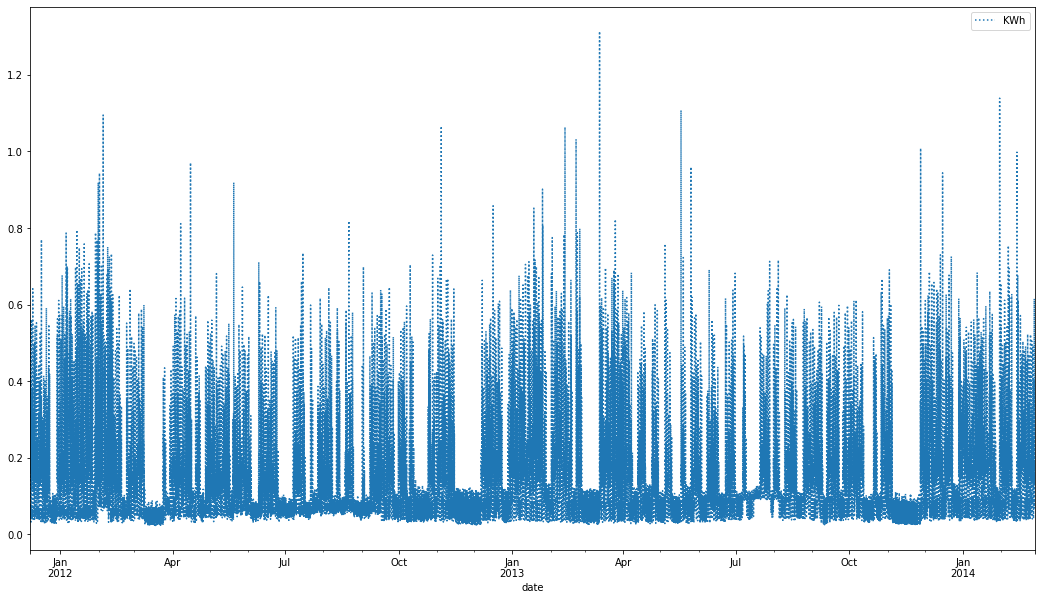

In [15]:
#resampling data to convert half-hourly data into hourly data ,i.e., downsampling
resample_dataf1=resample_data1.resample('60T').agg({'LCLid':'first','stdorToU':'first', 'DateTime':'first','KWh': np.mean, 'Acorn':'first','Acorn_grouped':'first'})
#storing resampled data of household having maximmum no. of samples in resampled1
resample_csv1=resample_dataf1.to_csv(r'/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/resampled1.csv', index = None, header=True)
print(resample_dataf1)
#visualizing resampled data of household having maximmum no. of samples
resample_dataf1.plot(style=[':','--','-'],figsize=(18,10))

In [11]:
#dataframe containing data of household having 2nd maximmum no. of samples
new_data2=result[result.LCLid==household_list[1]]
print(new_data2)

            LCLid stdorToU                     DateTime    KWh    Acorn  \
482919  MAC000022      Std  2011-12-07 10:00:00.0000000  0.255  ACORN-Q   
482920  MAC000022      Std  2011-12-07 10:30:00.0000000  0.278  ACORN-Q   
482921  MAC000022      Std  2011-12-07 11:00:00.0000000  0.268  ACORN-Q   
482922  MAC000022      Std  2011-12-07 11:30:00.0000000  0.185  ACORN-Q   
482923  MAC000022      Std  2011-12-07 12:00:00.0000000  0.186  ACORN-Q   
...           ...      ...                          ...    ...      ...   
521985  MAC000022      Std  2014-02-27 22:30:00.0000000  0.243  ACORN-Q   
521986  MAC000022      Std  2014-02-27 23:00:00.0000000  0.227  ACORN-Q   
521987  MAC000022      Std  2014-02-27 23:30:00.0000000  0.263  ACORN-Q   
521988  MAC000022      Std  2014-02-28 00:00:00.0000000  0.287  ACORN-Q   
521989  MAC000022      Std  2014-02-28 00:00:00.0000000  0.287  ACORN-Q   

       Acorn_grouped  
482919     Adversity  
482920     Adversity  
482921     Adversity  
482922 

In [12]:
#storing dataframe data into preprocessed2
new_csv2=new_data2.to_csv(r'/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/preprocessed2.csv', index = None, header=True)
resample_data2=pd.read_csv("/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/preprocessed2.csv",header=0)
resample_data2['date']=pd.to_datetime(resample_data2['DateTime'])
resample_data2=resample_data2.set_index(resample_data2.date)

                         LCLid stdorToU                     DateTime     KWh  \
date                                                                           
2011-12-07 10:00:00  MAC000022      Std  2011-12-07 10:00:00.0000000  0.2665   
2011-12-07 11:00:00  MAC000022      Std  2011-12-07 11:00:00.0000000  0.2265   
2011-12-07 12:00:00  MAC000022      Std  2011-12-07 12:00:00.0000000  0.2090   
2011-12-07 13:00:00  MAC000022      Std  2011-12-07 13:00:00.0000000  0.2130   
2011-12-07 14:00:00  MAC000022      Std  2011-12-07 14:00:00.0000000  0.2390   
...                        ...      ...                          ...     ...   
2014-02-27 20:00:00  MAC000022      Std  2014-02-27 20:00:00.0000000  0.3155   
2014-02-27 21:00:00  MAC000022      Std  2014-02-27 21:00:00.0000000  0.2750   
2014-02-27 22:00:00  MAC000022      Std  2014-02-27 22:00:00.0000000  0.2555   
2014-02-27 23:00:00  MAC000022      Std  2014-02-27 23:00:00.0000000  0.2450   
2014-02-28 00:00:00  MAC000022      Std 

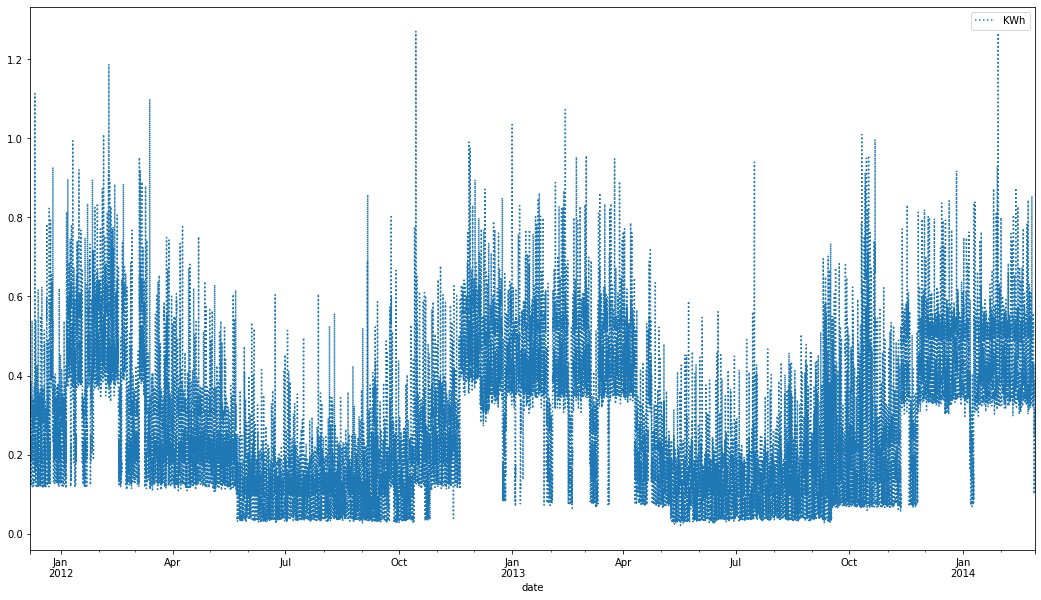

In [14]:
#resampling data to convert half-hourly data into hourly data ,i.e., downsampling
resample_dataf2=resample_data2.resample('60T').agg({'LCLid':'first','stdorToU':'first', 'DateTime':'first','KWh': np.mean, 'Acorn':'first','Acorn_grouped':'first'})
#storing resampled data of household having 2nd maximmum no. of samples in resampled2
resample_csv2=resample_dataf2.to_csv(r'/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/resampled2.csv', index = None, header=True)
print(resample_dataf2)
#visualizing resampled data of household having 2nd maximmum no. of samples
resample_dataf2.plot(style=[':','--','-'],figsize=(18,10))

In [16]:
#dataframe containing data of household having 3rd maximmum no. of samples
new_data3=result[result.LCLid==household_list[2]]
print(new_data3)

            LCLid stdorToU                     DateTime    KWh    Acorn  \
866634  MAC000033      Std  2011-12-07 13:00:00.0000000  0.175  ACORN-E   
866635  MAC000033      Std  2011-12-07 13:30:00.0000000  0.123  ACORN-E   
866636  MAC000033      Std  2011-12-07 14:00:00.0000000  0.063  ACORN-E   
866637  MAC000033      Std  2011-12-07 14:30:00.0000000  0.042  ACORN-E   
866638  MAC000033      Std  2011-12-07 15:00:00.0000000  0.057  ACORN-E   
...           ...      ...                          ...    ...      ...   
905699  MAC000033      Std  2014-02-27 22:30:00.0000000  0.144  ACORN-E   
905700  MAC000033      Std  2014-02-27 23:00:00.0000000  0.199  ACORN-E   
905701  MAC000033      Std  2014-02-27 23:30:00.0000000  0.165  ACORN-E   
905702  MAC000033      Std  2014-02-28 00:00:00.0000000  0.253  ACORN-E   
905703  MAC000033      Std  2014-02-28 00:00:00.0000000  0.253  ACORN-E   

       Acorn_grouped  
866634      Affluent  
866635      Affluent  
866636      Affluent  
866637 

In [17]:
#storing dataframe data into preprocessed3
new_csv3=new_data3.to_csv(r'/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/preprocessed3.csv', index = None, header=True)
resample_data3=pd.read_csv("/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/preprocessed3.csv",header=0)
resample_data3['date']=pd.to_datetime(resample_data3['DateTime'])
resample_data3=resample_data3.set_index(resample_data3.date)

                         LCLid stdorToU                     DateTime     KWh  \
date                                                                           
2011-12-07 13:00:00  MAC000033      Std  2011-12-07 13:00:00.0000000  0.1490   
2011-12-07 14:00:00  MAC000033      Std  2011-12-07 14:00:00.0000000  0.0525   
2011-12-07 15:00:00  MAC000033      Std  2011-12-07 15:00:00.0000000  0.0850   
2011-12-07 16:00:00  MAC000033      Std  2011-12-07 16:00:00.0000000  0.0655   
2011-12-07 17:00:00  MAC000033      Std  2011-12-07 17:00:00.0000000  0.0650   
...                        ...      ...                          ...     ...   
2014-02-27 20:00:00  MAC000033      Std  2014-02-27 20:00:00.0000000  0.1950   
2014-02-27 21:00:00  MAC000033      Std  2014-02-27 21:00:00.0000000  0.2245   
2014-02-27 22:00:00  MAC000033      Std  2014-02-27 22:00:00.0000000  0.1910   
2014-02-27 23:00:00  MAC000033      Std  2014-02-27 23:00:00.0000000  0.1820   
2014-02-28 00:00:00  MAC000033      Std 

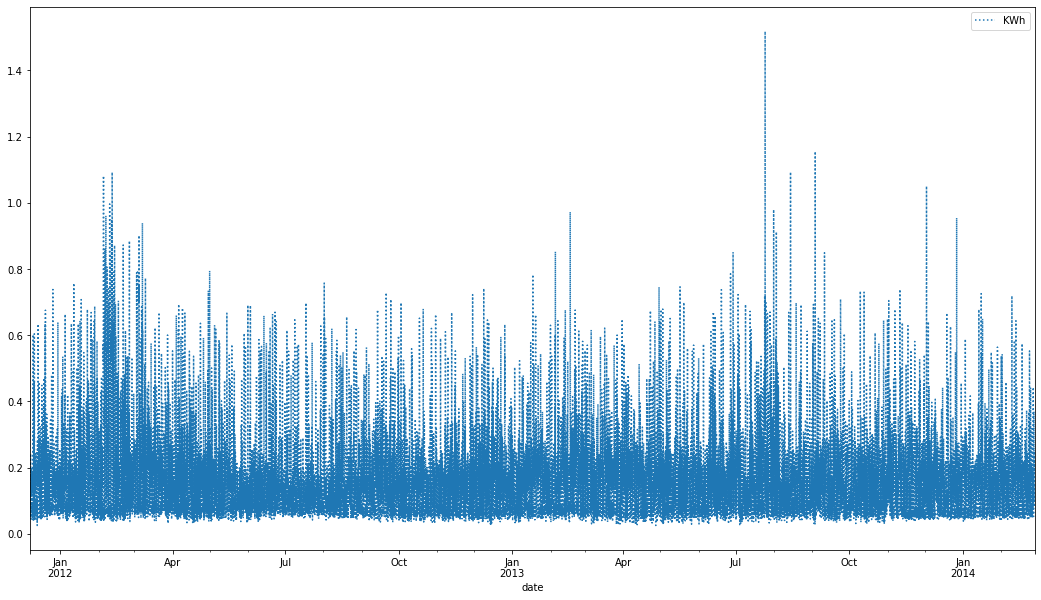

In [18]:
#resampling data to convert half-hourly data into hourly data ,i.e., downsampling
resample_dataf3=resample_data3.resample('60T').agg({'LCLid':'first','stdorToU':'first', 'DateTime':'first','KWh': np.mean, 'Acorn':'first','Acorn_grouped':'first'})
#storing resampled data of household having 3rd maximmum no. of samples in resampled2
resample_csv3=resample_dataf3.to_csv(r'/home/chaitanya/Documents/PythonProjects/TCSHumanAI/preprocess-generated-dataset/resampled3.csv', index = None, header=True)
print(resample_dataf3)
#visualizing resampled data of household having 3rd maximmum no. of samples
resample_dataf3.plot(style=[':','--','-'],figsize=(18,10))

                                KWh
DateTime                           
2011-12-07 15:00:00.0000000  0.1955
2011-12-07 16:00:00.0000000  0.1620
2011-12-07 17:00:00.0000000  0.5575
2011-12-07 18:00:00.0000000  0.3705
2011-12-07 19:00:00.0000000  0.1805
15617 3905
15615
3903
(15615, 1, 2) (15615,) (3903, 1, 2) (3903,)
Train on 15615 samples, validate on 3903 samples
Epoch 1/30
15615/15615 [==============================] - 3s 173us/sample - loss: 0.0479 - val_loss: 0.0477
Epoch 2/30
15615/15615 [==============================] - 1s 39us/sample - loss: 0.0413 - val_loss: 0.0443
Epoch 3/30
15615/15615 [==============================] - 1s 45us/sample - loss: 0.0401 - val_loss: 0.0438
Epoch 4/30
15615/15615 [==============================] - 1s 45us/sample - loss: 0.0398 - val_loss: 0.0434
Epoch 5/30
15615/15615 [==============================] - 1s 46us/sample - loss: 0.0397 - val_loss: 0.0432
Epoch 6/30
15615/15615 [==============================] - 1s 39us/sample - loss: 0.0396 - val_los

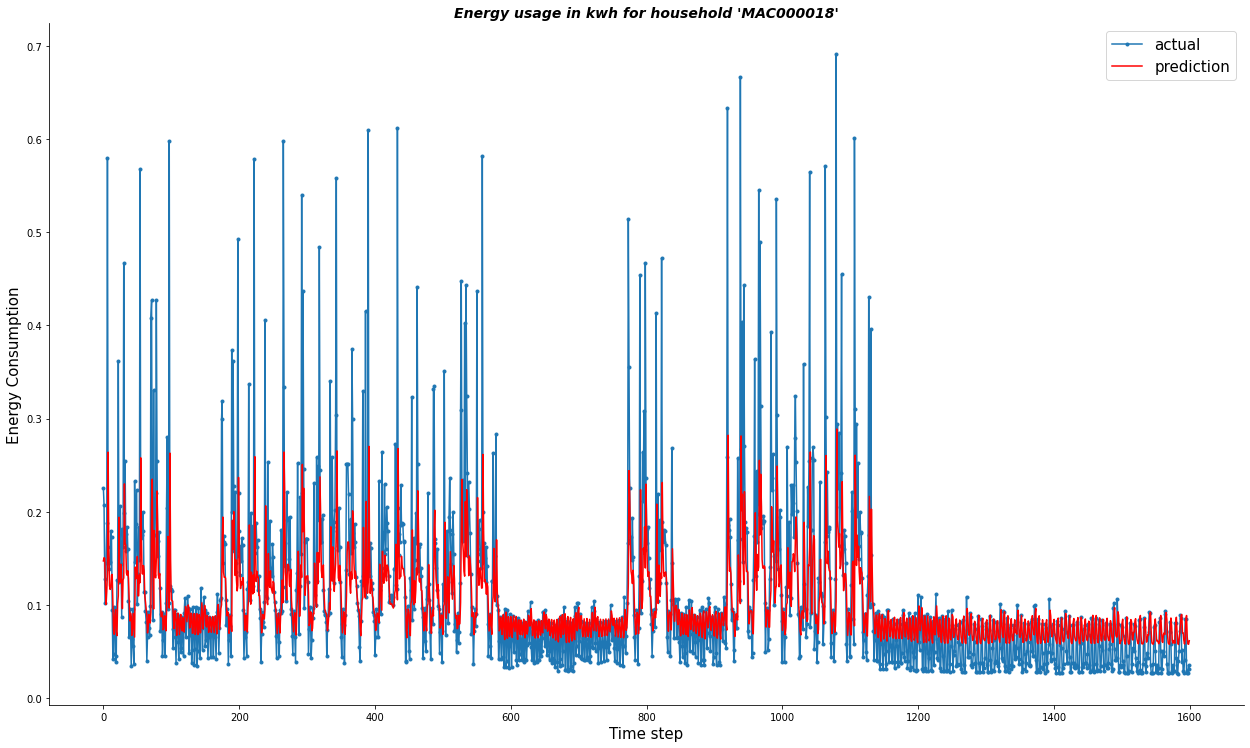

In [21]:
#creating model for household MAC000018
final_data1=resample_dataf1.loc[:,['KWh']]
final_data1=final_data1.set_index(resample_dataf1.DateTime)
print(final_data1.head())
values=final_data1['KWh'].values.reshape(-1,1)
values=values.astype('float32')
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(values)
train_size=int(len(scaled)*0.8)
test_size=len(scaled)-train_size
train,test=scaled[0:train_size,:],scaled[train_size:len(scaled),:]
print(len(train),len(test))
def create_dataset(dataset,look_back=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    print(len(dataY))
    return np.array(dataX),np.array(dataY)
look_back=2
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
import warnings  
with warnings.catch_warnings():  
    warnings.filterwarnings("ignore",category=FutureWarning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=30, batch_size=400, validation_data=(testX, testY), verbose=1, shuffle=False)
model.summary()
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])
aa=[x for x in range(1600)]
plt.figure(figsize=(18,10))
plt.plot(aa, testY[0][:1600], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:1600], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Energy Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.title("Energy usage in kwh for household 'MAC000018'", fontsize=14, fontstyle='italic', fontweight='bold')
#checking model performance by using RMSE & MAE
print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(testY[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], test_predict[:,0])))



                                KWh
DateTime                           
2011-12-07 13:00:00.0000000  0.1490
2011-12-07 14:00:00.0000000  0.0525
2011-12-07 15:00:00.0000000  0.0850
2011-12-07 16:00:00.0000000  0.0655
2011-12-07 17:00:00.0000000  0.0650
15619 3905
15617
3903
(15617, 1, 2) (15617,) (3903, 1, 2) (3903,)
Train on 15617 samples, validate on 3903 samples
Epoch 1/30
15617/15617 [==============================] - 3s 214us/sample - loss: 0.0531 - val_loss: 0.0422
Epoch 2/30
15617/15617 [==============================] - 1s 49us/sample - loss: 0.0439 - val_loss: 0.0397
Epoch 3/30
15617/15617 [==============================] - 1s 46us/sample - loss: 0.0420 - val_loss: 0.0378
Epoch 4/30
15617/15617 [==============================] - 1s 51us/sample - loss: 0.0406 - val_loss: 0.0367
Epoch 5/30
15617/15617 [==============================] - 1s 48us/sample - loss: 0.0399 - val_loss: 0.0361
Epoch 6/30
15617/15617 [==============================] - 1s 49us/sample - loss: 0.0396 - val_los

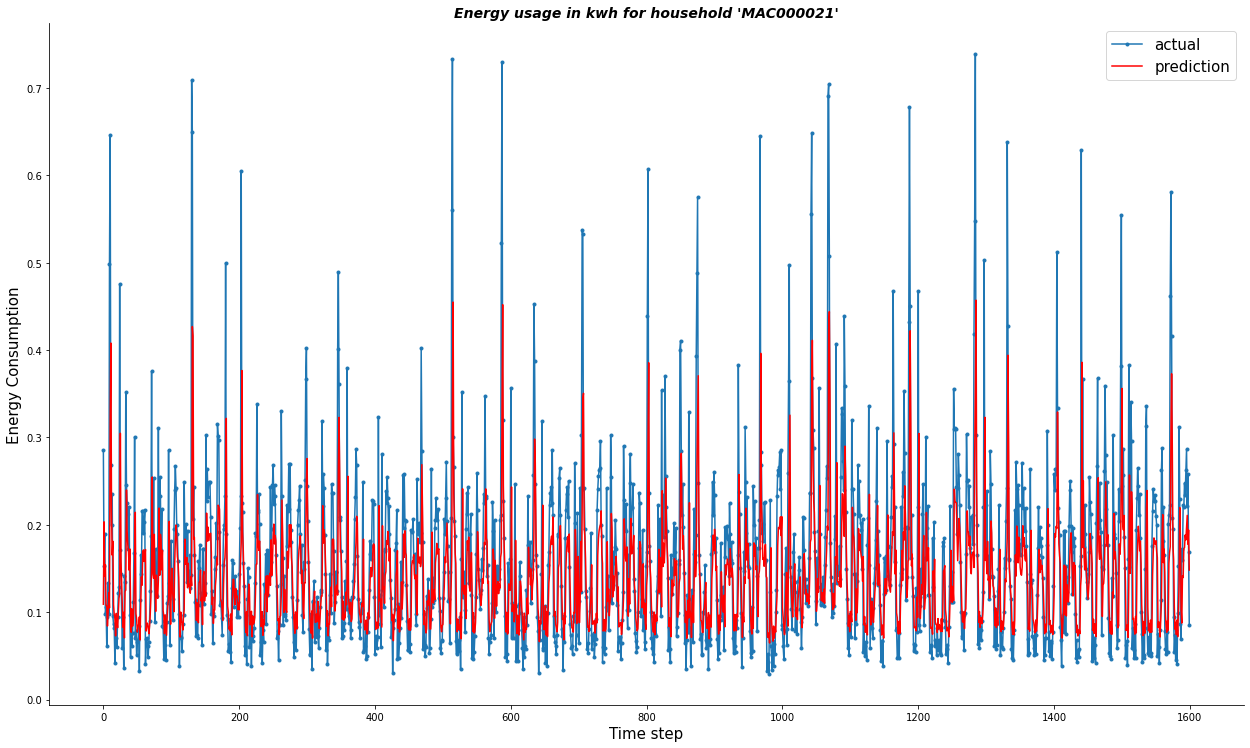

Train Mean Absolute Error: 0.05827998468894326
Train Root Mean Squared Error: 0.09554135057601908
Test Mean Absolute Error: 0.05296244587340259
Test Root Mean Squared Error: 0.0826306605356214


In [26]:
#creating model for household MAC000021
final_data3=resample_dataf3.loc[:,['KWh']]
final_data3=final_data3.set_index(resample_dataf3.DateTime)
print(final_data3.head())
values3=final_data3['KWh'].values.reshape(-1,1)
values3=values3.astype('float32')
scaler3=MinMaxScaler(feature_range=(0,1))
scaled3=scaler3.fit_transform(values3)
train_size3=int(len(scaled3)*0.8)
test_size3=len(scaled3)-train_size3
train3,test3=scaled3[0:train_size3,:],scaled3[train_size3:len(scaled3),:]
print(len(train3),len(test3))
trainX3,trainY3=create_dataset(train3,look_back)
testX3,testY3=create_dataset(test3,look_back)
trainX3=np.reshape(trainX3,(trainX3.shape[0],1,trainX3.shape[1]))
testX3=np.reshape(testX3,(testX3.shape[0],1,testX3.shape[1]))
print(trainX3.shape, trainY3.shape, testX3.shape, testY3.shape)
model = Sequential()
model.add(LSTM(100, input_shape=(trainX3.shape[1], trainX3.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history3 = model.fit(trainX3, trainY3, epochs=30, batch_size=400, validation_data=(testX3, testY3), verbose=1, shuffle=False)
model.summary()
train_predict3 = model.predict(trainX3)
test_predict3 = model.predict(testX3)
# invert predictions
train_predict3 = scaler3.inverse_transform(train_predict3)
trainY3 = scaler3.inverse_transform([trainY3])
test_predict3 = scaler3.inverse_transform(test_predict3)
testY3 = scaler3.inverse_transform([testY3])
aa3=[x3 for x3 in range(1600)]
plt.figure(figsize=(18,10))
plt.plot(aa3, testY3[0][:1600], marker='.', label="actual")
plt.plot(aa3, test_predict3[:,0][:1600], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Energy Consumption', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.title("Energy usage in kwh for household 'MAC000021'", fontsize=14, fontstyle='italic', fontweight='bold')
plt.show()
#checking model performance by using RMSE & MAE
print('Train Mean Absolute Error:', mean_absolute_error(trainY3[0], train_predict3[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY3[0], train_predict3[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(testY3[0], test_predict3[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY3[0], test_predict3[:,0])))